# project 3 : camera sticker

## Rubric
평가문항 상세기준
1. 자기만의 카메라앱 기능 구현을 완수하였다.	얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다.	정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.	얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

## version check

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import cv2          # OpenCV library - handle pictures
import dlib         # find face landmarks using dlib

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


## inputs

- sticker [Cat Whiskers free icon]('https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1')
- picture (injoon - me!)

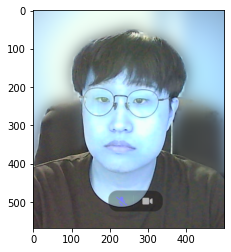

In [2]:
injoon_image_path = './images/injoon.PNG' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(injoon_image_path,1)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. 

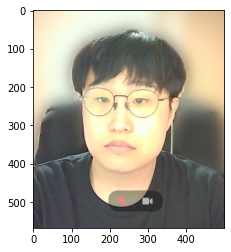

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(117, 192) (340, 415)]]


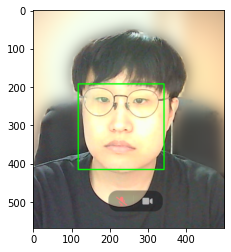

In [6]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = './models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


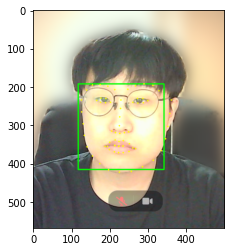

In [9]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(224, 301)
(x,y) : (224,189)
(w,h) : (224,224)


In [11]:
sticker_path = './images/cat-whiskers.png' # 고양이 이미지의 경로
img_sticker = cv2.imread(sticker_path,cv2.IMREAD_UNCHANGED) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수
print (img_sticker.shape) # 사이즈를 조정한 고양이 이미지의 차원 확인

(224, 224, 4)


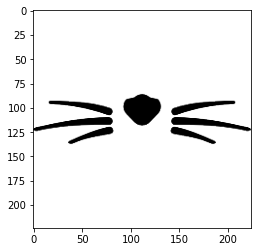

In [12]:
plt.imshow(img_sticker)
    
plt.show()

In [13]:
refined_x = x - w // 2 
refined_y = y 

In [14]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 고양이 이미지를 씌우기 위해 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] 
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (112,189)


In [15]:
# 수염 이미지가 PNG 형식인 경우, 4번째 채널은 알파 채널
if img_sticker.shape[2] == 4:
    alpha_mask = img_sticker[:, :, 3] / 255.0
    img_sticker_rgb = img_sticker[:, :, :3]
else:
    alpha_mask = 1
    img_sticker_rgb = img_sticker

# alpha_mask의 차원을 img_sticker_rgb와 일치
alpha_mask = np.expand_dims(alpha_mask, axis=2)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = alpha_mask * img_sticker_rgb + (1 - alpha_mask) * img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]


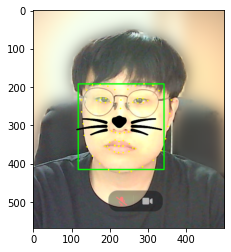

In [16]:
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()

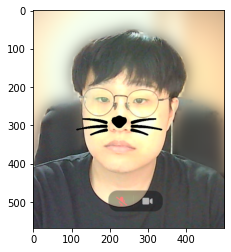

In [17]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# img_sticker의 알파 채널만 사용하여 조건을 만든다
img_sticker_alpha = img_sticker[:, :, 3]
img_sticker_alpha = np.repeat(img_sticker_alpha[:, :, np.newaxis], 3, axis=2)

# img_sticker를 RGB 이미지로 변환
img_sticker_rgb = img_sticker[:, :, :3]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker_alpha==0,sticker_area,img_sticker_rgb).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


## Paste sticker on Picture 함수화

In [18]:
def be_a_cat(human_picture_path):
    
    image_path =  human_picture_path  # 본인 이미지가 있는 경로를 가지고 온다.
    img_bgr = cv2.imread(image_path,1)    # OpenCV로 이미지를 불러옵니다
    img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    detector_hog = dlib.get_frontal_face_detector()
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
    plt.show() # 이미지 실제 출력
    dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
    
    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    model_path = './models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    # face landmark 좌표를 저장해둡니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
        print (landmark[30]) # 코의 index는 30 입니다
        x = landmark[30][0] # 이미지에서 코 부위의 x값
        y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 
        w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
        print (f'(x,y) : ({x},{y})')
        print (f'(w,h) : ({w},{h})')
    
    sticker_path = './images/cat-whiskers.png' # 고양이 이미지의 경로
    img_sticker = cv2.imread(sticker_path,cv2.IMREAD_UNCHANGED) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
    img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
    
    
    refined_x = x - w // 2 
    refined_y = y
    
    if refined_x < 0: 
        img_sticker = img_sticker[:, -refined_x:]
        refined_x = 0
    # 고양이 이미지를 씌우기 위해 이미지가 시작할 y좌표 값 조정
    if refined_y < 0:
        img_sticker = img_sticker[-refined_y:, :] 
        refined_y = 0
        
    # 수염 이미지가 PNG 형식인 경우, 4번째 채널은 알파 채널
    if img_sticker.shape[2] == 4:
        alpha_mask = img_sticker[:, :, 3] / 255.0
        img_sticker_rgb = img_sticker[:, :, :3]
    else:
        alpha_mask = 1
        img_sticker_rgb = img_sticker

    # alpha_mask의 차원을 img_sticker_rgb와 일치
    alpha_mask = np.expand_dims(alpha_mask, axis=2)

    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = alpha_mask * img_sticker_rgb + (1 - alpha_mask) * img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    
    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
    plt.imshow(img_show_rgb)
    plt.title('with box')
    # 이미지를 준비
    plt.show()
    
    
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    # img_sticker의 알파 채널만 사용하여 조건을 만든다
    img_sticker_alpha = img_sticker[:, :, 3]
    img_sticker_alpha = np.repeat(img_sticker_alpha[:, :, np.newaxis], 3, axis=2)

    # img_sticker를 RGB 이미지로 변환
    img_sticker_rgb = img_sticker[:, :, :3]

    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker_alpha==0,sticker_area,img_sticker_rgb).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title('without box')
    plt.show()


### 얼굴 돌려가며 같은 작업 수행

./images/injoon/injoon4.PNG


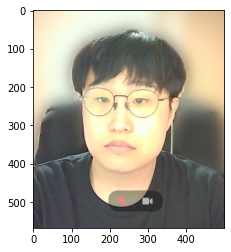

(224, 301)
(x,y) : (224,189)
(w,h) : (224,224)


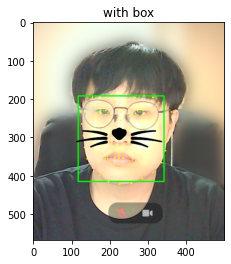

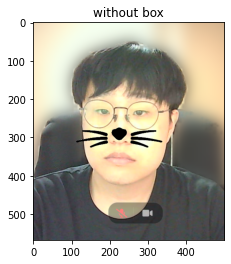

./images/injoon/injoon5.PNG


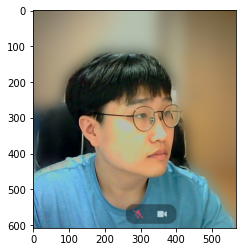

(372, 350)
(x,y) : (372,238)
(w,h) : (224,224)


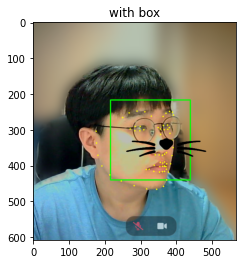

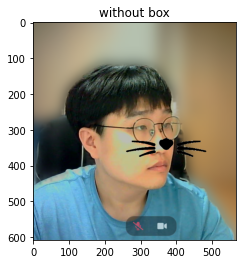

./images/injoon/injoon42.PNG


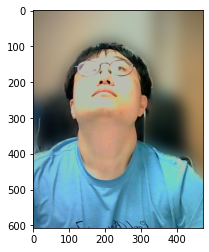

UnboundLocalError: local variable 'w' referenced before assignment

In [19]:
injoon_image_dir = './images/injoon' # 인준 디렉토리에 사진 추가

images = os.listdir(injoon_image_dir)

for image in images:
    imagepath = os.path.join(injoon_image_dir, image)
    be_a_cat(imagepath) # 고양이 수염 스티커가 생기는 함수

### 얼굴 인식

1 얼굴 각도가 약간 틀어진 것에 대해서는 인식가능한 모습이 보였으나 그 이상 지나치면 박스를 잡는데 실패하고 에러가 발생함을 확인 가능했다.

2 고개가 돌아갔을때 얼굴 돌아간 방향 벡터를 잡아내서 수염 또한 tilt 가능할 것으로 생각된다 